## Part 8-1: K Nearest Neighbors (KNN)

More info about the dataset: 
https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level


### Step1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step2: Import the Dataset

In [2]:
df= pd.read_csv('gene_expression.csv')

### Step3: Data Overview

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.shape

(3000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


### Step4: EDA

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

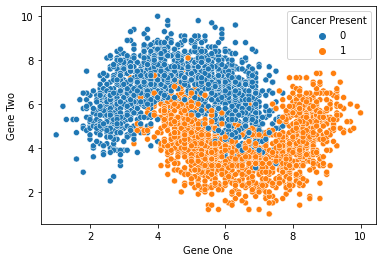

In [6]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

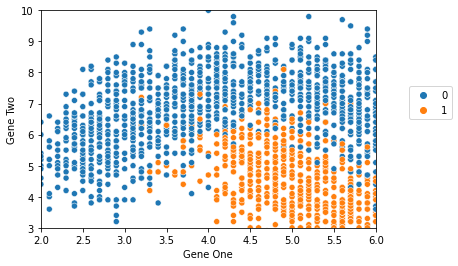

In [7]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')
plt.xlim(2, 6)
plt.ylim(3, 10)
plt.legend(loc=(1.1, 0.5))

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

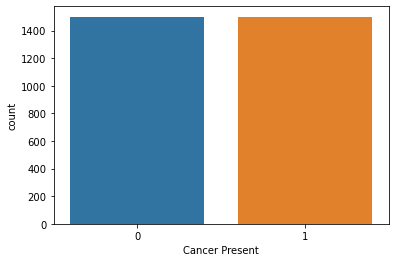

In [8]:
sns.countplot(data=df, x='Cancer Present')

In [9]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

### Step5: Determine the Features & Target Variable

In [10]:
X= df.drop('Cancer Present', axis=1)
y= df['Cancer Present']

### Step6: Split the Data to Train & Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step7: Scaling the Features

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler= StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

### Step8: Train the Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model= KNeighborsClassifier(n_neighbors=1)

In [19]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Step9: Predicting Test Data

In [20]:
y_pred= knn_model.predict(scaled_X_test)

In [21]:
#The prediction Value VS Actual Value of Test Data
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred})

,Y_Test,Y_Pred
1801,1,1
1190,1,1
1817,1,1
251,0,0
2505,0,0
...,...,...
2443,1,0
856,0,0
1983,1,1
166,0,1


### Step10: Evaluating the Model

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.8944444444444445

In [24]:
confusion_matrix(y_test, y_pred)

array([[424,  46],
       [ 49, 381]])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



### Elbow Method for Choosing Reasonable K Values

In [26]:
test_error_rate= []


for k in range (1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [27]:
test_error_rate

[0.10555555555555551,
 0.09999999999999998,
 0.07444444444444442,
 0.07777777777777772,
 0.07222222222222219,
 0.06666666666666665,
 0.06333333333333335,
 0.05888888888888888,
 0.05777777777777782,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.061111111111111116,
 0.061111111111111116,
 0.06000000000000005,
 0.05777777777777782,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Value')

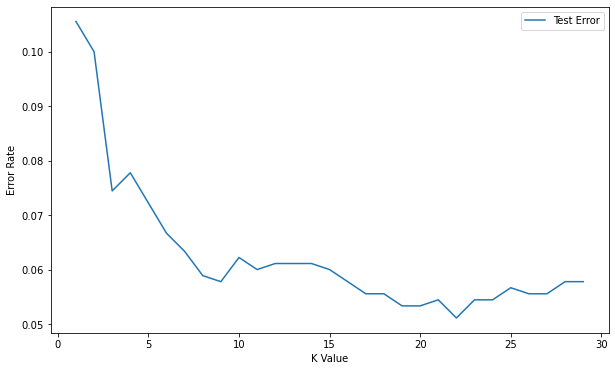

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

### Creating a Pipeline to find K value

In [29]:
scaler= StandardScaler()


In [30]:
knn= KNeighborsClassifier()

In [31]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [32]:
operations= [('scaler', scaler), ('knn', knn)]

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe= Pipeline(operations)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
k_values= list(range(1, 20))

In [37]:
param_grid= {'knn__n_neighbors': k_values}

In [38]:
full_cv_classifier= GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [39]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [40]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [41]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

# Final Model

In [42]:
scaler= StandardScaler()
knn14= KNeighborsClassifier(n_neighbors=14)
operations= [('scaler', scaler), ('knn14', knn14)]

In [43]:
pipe= Pipeline(operations)

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [45]:
pipe_pred= pipe.predict(X_test)

In [46]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



# Part8-2: Support Vector Machine (SVC)

## Step1: Import all Necessary Libraries

In [54]:
# Necessary Libraries were imported

## Stpe2: Import the Dataset

In [55]:
from sklearn.datasets import load_breast_cancer

In [56]:
cancer= load_breast_cancer()

In [57]:
# What this dataset include:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [58]:
# Show the description for the dataset:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [59]:
#make a datafarme for the features:
df_features= pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

## Step3: Data Overview


In [60]:
#Feature DataFrame Overview:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [62]:
# Target Column:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [63]:
cancer['target'].shape

(569,)

In [64]:
df_features.shape

(569, 30)

## Step4: EDA 

In [65]:
# Do it by yourself

## Step5: Determine the Features and Lable

In [66]:
X= df_features
y= cancer['target']

## Step6: Split the Dataset to Train and Test


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Step7: Train the Model


In [70]:
from sklearn.svm import SVC

In [71]:
model= SVC()

In [72]:
model.fit(X_train, y_train)

SVC()

## Step8: Predicting Test data

In [73]:
y_pred= model.predict(X_test)

## Step9: Evaluating the Model


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
confusion_matrix(y_test, y_pred)

array([[ 56,  10],
       [  3, 102]])

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# Hyperparameters:
**Choosing the best hyperparameters through GridSearchCV**

In [77]:
#help(SVC)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid, cv=5)

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [81]:
grid.best_estimator_

SVC(C=100, gamma=1, kernel='linear')

In [82]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [83]:
y_pred_grid= grid.predict(X_test)

In [84]:
confusion_matrix(y_test, y_pred_grid)

array([[ 59,   7],
       [  3, 102]])

In [85]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

